In [ ]:
!pip install textblob
!pip install seaborn==0.11.0


In [1]:
from textblob import TextBlob
from textblob import Word
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Dataset Url: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [2]:
review_datasets = pd.read_csv("Reviews.csv")

In [3]:
review_datasets = review_datasets.head(20000)
review_datasets.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
review_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
review_datasets['Score'].value_counts()

5    12571
4     2836
1     1824
3     1649
2     1120
Name: Score, dtype: int64

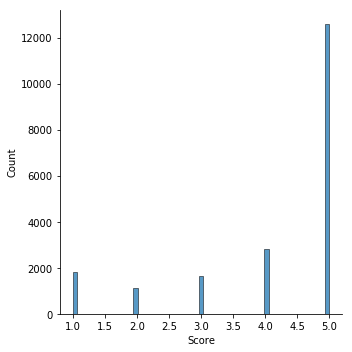

In [7]:
%matplotlib inline
sns.displot(review_datasets['Score'])

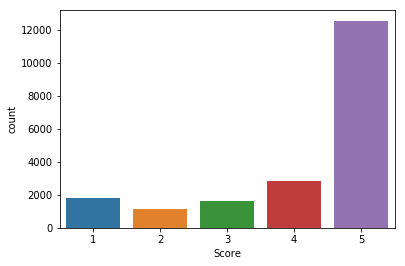

In [8]:
sns.countplot(x='Score',data=review_datasets)

In [9]:
review_datasets['Text'][3]

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

In [10]:
textBlob_Object = TextBlob(review_datasets['Text'][3])
print(textBlob_Object.sentiment)

Sentiment(polarity=0.16666666666666666, subjectivity=0.5333333333333333)


In [11]:
def get_polarity(review):
    return TextBlob(review).sentiment.polarity

In [12]:
review_datasets['Sentiment_Polarity'] = review_datasets['Text'].apply(get_polarity)

In [13]:
review_datasets.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.257407
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.250833
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,0.486000
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0.428571
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.450000


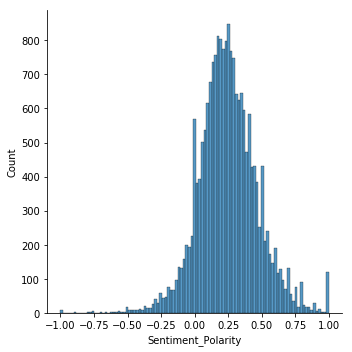

In [15]:
sns.displot(review_datasets['Sentiment_Polarity'])

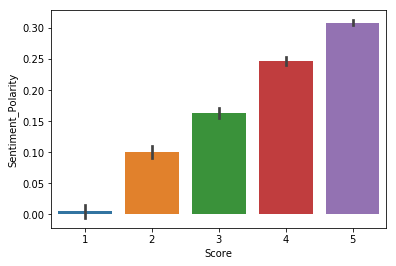

In [17]:
sns.barplot(x='Score',y='Sentiment_Polarity', data=review_datasets)

In [18]:
negative_reviews = review_datasets[review_datasets.Sentiment_Polarity == -1].Text.head()
print(negative_reviews)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [19]:
review_datasets['Text'][545]

'These chips are nasty.  I thought someone had spilled a drink in the bag, no the chips were just soaked with grease.  Nasty!!'

In [20]:
postive_reviews = review_datasets[review_datasets.Sentiment_Polarity == 1].Text.head()
print(postive_reviews)

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object


In [21]:
review_datasets['Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

In [22]:
review_datasets['Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'

In [23]:
review_datasets['Text'][796]

"My mother and father were the recipient of these wonderful pieces of chocolate heaven.  They didn't believe they deserved receiving these, but I know they did deserve to receive these!"

In [24]:
review_datasets.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...,0.195536
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...,0.099603
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...,0.227431
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa...",0.059167
19999,20000,B002C50X1M,A3LWC833HQIG7J,austin_Larry,0,0,5,1295568000,"Excellent chips, full of flavor and just the r...",I purchased the Salt and Vinegar chips and hav...,0.390556


In [25]:
review_datasets['Text'][19999]

'I purchased the Salt and Vinegar chips and have been very pleased. There is the right amount of vinegar, virtually every single chip I have tasted is done just right, no burned chips, and they have an excellent thickness to impart just the correct amount of potato taste.<br /><br />They go great with lunches or as a snack. They are very economical. Beats the heck in terms of quality, taste, and price to buying these at work or out and about (I bought the 2 ounce bags). I will be trying some of the other intriguing flavors. Recommended.'

In [26]:
!pip install wordcloud

In [27]:
word_tok = ''
for txt in review_datasets['Summary']:
    word_tok += str(txt)

In [28]:
blob = TextBlob(word_tok)

In [29]:
blob.word_counts

defaultdict(int,
            {'good': 1019,
             'quality': 124,
             'dog': 423,
             'foodnot': 6,
             'as': 318,
             'advertised': 5,
             'delight': 7,
             'says': 19,
             'it': 685,
             'allcough': 1,
             'medicinegreat': 1,
             'taffynice': 1,
             'taffygreat': 1,
             'just': 157,
             'the': 1500,
             'expensive': 48,
             'brands': 3,
             'wonderful': 71,
             'tasty': 187,
             'taffyyay': 1,
             'barleyhealthy': 1,
             'foodthe': 6,
             'best': 634,
             'hot': 210,
             'sauce': 60,
             'in': 504,
             'worldmy': 1,
             'cats': 75,
             'love': 590,
             'this': 622,
             'diet': 27,
             'food': 231,
             'better': 157,
             'than': 190,
             'their': 30,
             'regular': 33,
        

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
print(STOPWORDS)

{'do', 'for', 'some', "it's", 'below', "weren't", 'so', 'me', 'his', 'only', 'other', 'ourselves', 'while', 'both', 'cannot', 'i', 'r', "i'll", 'during', 'like', 'all', 'ought', 'should', 'also', 'therefore', 'who', 'here', 'which', "they're", 'of', 'no', "shan't", "you've", "i'm", 'otherwise', 'under', 'this', 'hence', "can't", 'that', "shouldn't", 'whom', 'few', 'their', 'them', "i've", 'than', 'him', "when's", "didn't", "you'd", "he's", 'if', 'ours', "she's", "hadn't", 'such', "won't", 'else', "don't", 'about', "aren't", 'or', 'a', 'had', 'have', 'k', "you're", "how's", "she'll", "they've", 'down', 'having', 'above', 'she', "we're", 'from', 'up', "we've", 'being', 'are', "we'd", "who's", 'your', 'yourself', 'it', 'was', 'before', 'to', 'were', 'they', 'since', "here's", 'my', "i'd", 'can', 'shall', 'when', "let's", 'you', 'http', 'would', "mustn't", 'in', 'the', 'more', 'yourselves', "they'll", 'out', 'by', 'am', 'what', 'but', 'on', 'where', 'those', 'between', "there's", 'each', '

In [33]:
print(len(STOPWORDS))

192


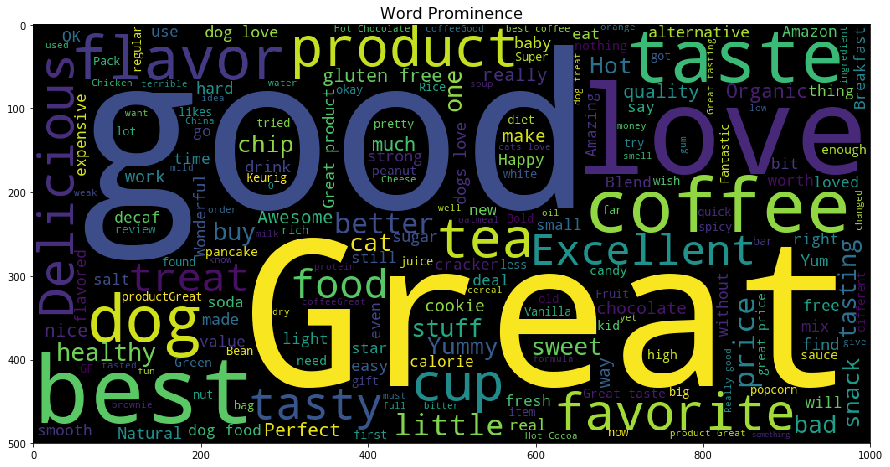

In [34]:
wc = WordCloud(width=1000, height=500).generate(word_tok)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.title('Word Prominence', size=16)
plt.savefig('wordcloud.png')
plt.axis('on')
plt.show()